## NLTK Corpus

In [2]:
# nltk brown, inaugural

import nltk
nltk.download(['inaugural', 'brown'])

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [3]:
brown = nltk.corpus.brown

In [5]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories = genre)
)

genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions = genres, samples = modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [17]:
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals)
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories = genre)
        if word.lower() == modals # candidate
)

cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [11]:
### 보충

### Inaugural
- 연설문 데이터

In [12]:
inaugural = nltk.corpus.inaugural

In [21]:
inaugural.fileids()[:3] # 연도-이름.txt 형태

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt']

#### Quiz. inaugural에서 america, citizen의 빈도수, 연도별로

In [6]:
"""
nltk.ConditionalFreqDist(
        (target_word, fileids) # fileid에서 .txt 제거하기
        # 작성하기
)
"""

'\nnltk.ConditionalFreqDist(\n        (target_word, fileids) # fileid에서 .txt 제거하기\n        # 작성하기\n)\n'

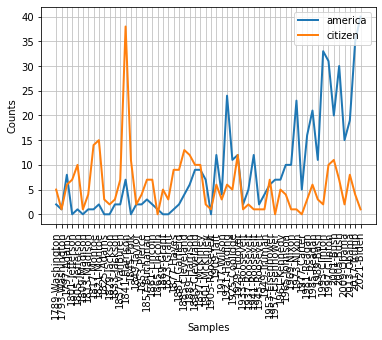

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
cfd3 = nltk.ConditionalFreqDist(
    # (genre, modals) 
    (target_word, fileid[:-4])
    #(fileid[:-4], target_word) # 순서 바꾸기도 가능(x <-> y축)
    
    # for genre in brown.categories()
    for fileid in inaugural.fileids()
    
    # for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    for target_word in ['america', 'citizen']
    
    # for word in brown.words(categories = genre)
    for word in inaugural.words(fileids = fileid)
        # if word.lower() == modals # candidate
        if word.lower().startswith(target_word)
)

cfd3.plot()

## Tuple & List

1. 생성하기

In [27]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

1-1.요소가 2개 이상일 때

In [28]:
listA = ['a', 'b']
tupleA = 'a','b' # 괄호 없이 사용하는 것이 일반적
tupleA = ('a','b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

1-2. 요소가 1개일 때

In [29]:
listA = ['a']
tupleA = ('a',) #,(comma)가 붙어야 함, 붙이지 않으면 스트링
tupleA = 'a',

tupleA, listA

(('a',), ['a'])

In [30]:
ex = ('a')
type(ex)

str

2. 여러 변수 할당하기
- packing: 하나의 변수에 여러 개의 데이터를 할당함
    - 리스트, 튜플 등이 여기에 속함
    - a = [1, 2, 3, 4]
- unpacking: 여러 변수에 하나의 데이터를 할당함, 그것을 각각의 변수로 변환함
    - a, b, c = [1, 2, 3]

In [31]:
name = 'lee'
a, b, c = name
a, b, c # unpacking

('l', 'e', 'e')

In [35]:
# 값 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd'
temp1 = pwd
temp2 = userId
pwd = temp2
userId = temp1

# 튜플 사용 => 길게 거쳐가지 않아도 되는 것이 장점
pwd, userId = userId, pwd
pwd, userId

('abcd', 'hello')

3. 연산
- 리스트와 동일

In [36]:
('a',) + ('b', 'c')

('a', 'b', 'c')

In [38]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [40]:
a = 1, 2
b = 1, 3

a, b

((1, 2), (1, 3))

4. 순회하기
- 리스트와 동일하게 loop 가능

In [41]:
a = 1, 2, 3, 4, 5

for i in a:
    print(a)

(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)
(1, 2, 3, 4, 5)


5. list comprehension
- tuple? (존재x)

In [44]:
# 1. 
tuple([word for word in a])
      
# 2. 느린 방법
*[word for word in a],

(1, 2, 3, 4, 5)

6. 튜플은 불변 객체
- a = 1, 2, 3, 4
- 코드 수정 시, 수정할 수 없도록 하는 용도로 사용함.
- 예) key 값 저장

blue = 1
white = 2
.
.
.

- 메모리 사용 적음

In [47]:
a = (1,) 
b = (1, 2, 3)
id(a), id(a + b) # 튜플 a를 수정한 것 X, a+b를 하여 새로운 c를 만들어낸 것

(2492174531840, 2492173609376)

7. 형 변환
- tuple()
- ()

In [48]:
tuple('cat'), ['cat'] # 주의!

(('c', 'a', 't'), ['cat'])

In [49]:
list('cat'), ['cat']

(['c', 'a', 't'], ['cat'])

In [50]:
b[0]

1

- 튜플의 장점:
    - 타인이 변경하는 것을 막을 수 있음 **
    - 메모리 사용 적음
- 리스트 장점:
    - 데이터를 순차적으로 파악하기에 적함
    - 중복되는 데이터를 포함할 수 있음

In [5]:
text = brown.raw(categories = 'romance')[:5000] # => list of words, sentence split 남긴 형태로 출력
text

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo

과제) brown 코퍼스에서 romance 장르 raw 앞에서 5000개 선택
- 문장 분철 있는 토큰 리스트로 만들기
- 리스트컴프리핸션, for문 사용하여 불필요한 것들 제거하기
- 문장 부호 모두 제거

\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd
['They', 'neither', 'liked']

### List 관련 함수

#### 1. 항목 변경하기

In [66]:
days = ['월', '화', '수', '목']

In [67]:
# append(): 마지막에 요소 추가

days.append('fri')
days

['월', '화', '수', '목', 'fri']

In [68]:
# insert: 오프셋 지정 가능

days.insert(2, 'Sat')
days

['월', '화', 'Sat', '수', '목', 'fri']

#### extend와 append의 차이점
- extend: 병합이 되어 삽입됨
- append: 리스트 자체가 하나의 item으로 삽입됨

In [70]:
listA = ['토', '일']
days.extend(listA)
days

# 두 번 실행시키면 두 번 병합됨

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '토', '일']

In [71]:
days.append(listA)
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '토', '일', ['토', '일']]

In [72]:
days == listA
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '토', '일', ['토', '일']]

In [73]:
# 오프셋으로 접근

days[-3] = '공휴일'
days

['월', '화', 'Sat', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [74]:
# 슬라이싱: 개수 달라도 오류 x

days[:3] = 1, 2, 3
days

[1, 2, 3, '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [75]:
# 문자열로 접근 시 주의! 글자 하나하나 순회하여 들어감

days[:3] = 'cat'
days

['c', 'a', 't', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [76]:
# a = 1, 2, 3, 4, 5
a = list(range(1, 6)) # 리스트로 가져오기 가능
a

[1, 2, 3, 4, 5]

### 삭제하기
- del
- remove
- pop
- clear

In [77]:
# 1. 오프셋

del days[0] # 자리가 보존되지 않고 item이 하나씩 앞당겨짐
days

['a', 't', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [78]:
# 2. 특정 값 삭제

days.remove('a') # 0번째만 삭제
days

['t', '수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [79]:
# 3. pop(index) ( default = -1 맨 마지막 요소를 삭제)

days.pop(0)

't'

In [80]:
days

['수', '목', 'fri', '토', '일', '공휴일', '일', ['토', '일']]

In [82]:
# clear: 전부 삭제

days.clear()
days

[]

### 값 찾기

In [67]:
a = list(range(5))
a.index(2)

2

In [68]:
# 값 확인
3 in a

True

#### 정렬하기
- 리스트.sort(reverse): 정렬 뒤 값 반환하지 않고 기존 값 변경
- sorted(리스트, reverse): 정렬된 복사본을 반환, 기존 값은 유지됨


- 리스트.reverse()
- list(reversed(리스트)): 리스트로 감싸야 함

In [70]:
sorted(a, reverse = True)

[4, 3, 2, 1, 0]

In [71]:
a

[0, 1, 2, 3, 4]

In [73]:
a. sort()
a

[0, 1, 2, 3, 4]

In [74]:
b = sorted(a, reverse = True)

In [75]:
a, b

([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

In [77]:
b.sort()
b

[0, 1, 2, 3, 4]

In [78]:
b

[0, 1, 2, 3, 4]

In [81]:
c = list(reversed(b))
c

[4, 3, 2, 1, 0]

#### 할당하기
- '='로 할당할 때는 하나의 값이 변하면 함께 변함. (메모리 주소를 참조하고 있으므로)
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
- deep copy
    - 하위에 중

In [82]:
a

[0, 1, 2, 3, 4]

In [87]:
b = a  # [0, 1, 2, 3, 4]에 a, b가 메모리 주소를 참조함
b[0] = 7
b

[7, 1, 2, 3, 4]

In [85]:
a # a도 변경됨

[7, 1, 2, 3, 4]

In [88]:
id(a), id(b)

(2492173526912, 2492173526912)

In [89]:
# shallow

b = a.copy()
c = list(a)
d = a[:]

id(a), id(b), id(c), id(d) # 모두 다른 값

(2492173526912, 2492172985856, 2492173591104, 2492173525376)

In [90]:
a.append([6, 7, 8])
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [91]:
e = a.copy()
e

[7, 1, 2, 3, 4, [6, 7, 8]]

In [94]:
a[-1][0] = 0
a, e

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [95]:
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [97]:
f[-1][-1] = 9
a, f

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

#### 순회하기
- zip(): 여러 개의 리스트 동시 순회
- enumerate(): 인덱스도 함께 순회하고자 할 때 (list, range)
- range()

In [100]:
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b): # 아이템 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [101]:
list(zip(a, b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [102]:
dict(zip(a, b)) # 딕셔너리

{1: 'mon', 2: 'tue', 3: 'wed'}

In [109]:
for idx, itemA in enumerate(b):
    print((idx, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


#### 리스트 컴프리핸션

In [111]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

### mini quiz
- 리스트 컴프리핸션 -> for문으로 바꾸기
    - for문을 사용하여 ex를 구현하기
        - a, b

In [116]:
result = []

for nal, day in zip(a, b):
    result.append((nal, day)) # 주의: () 감싸주기
    
result

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [119]:
# for day in b
    # for nal in a
[(nal, day) for nal in a for day in b] # nal, day 각각 선언

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

### Mini Quiz

Q1. 
- sentence = "don't judge a book by its cover"
- [(대문자, 타이틀, 글자 수)] 의 형태로 저장된 리스트로 만들기

Q2.
- text = [['hello', 'guys'], ['how', 'are', 'you']]
- 2-1. 문장으로 구성된 리스트로 만들기
         - ['hellp guys', 'how are you']
- 2-2. 전체 단어를 하나의 리스트로 가져오기
        - ['', '', '', '']
- 2-3. 전체를 스트링으로 가져오기
        - 'hello guys how are you

Q1.

In [123]:
sentence = "don't judge a book by its cover"
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

Q2.

In [125]:
text = [['hello', 'guys'], ['how', 'are', 'you']]

In [130]:
# 1.

[' '.join(sent) for sent in text] # ['', '']

['hello guys', 'how are you']

In [131]:
for sent in text:
    for word in sent:
        print(word)

hello
guys
how
are
you


In [133]:
# 2.

[word for sent in text for word in sent]

['hello', 'guys', 'how', 'are', 'you']

In [137]:
# 3.

' '.join([word for sent in text for word in sent])

'hello guys how are you'